#Importing Iibraries

In [79]:
!pip install xgboost

In [122]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
sns.set(style="whitegrid", palette="pastel")
from imblearn.under_sampling import RandomUnderSampler

In [81]:
#Ioad Data

In [82]:
df = pd.read_csv("bank-full.csv", sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#Data Exploration and Cleaning

In [84]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [85]:
df.tail(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [86]:
df.sample(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29065,34,blue-collar,married,secondary,no,-271,yes,yes,cellular,2,feb,90,1,252,2,failure,no


In [87]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [89]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

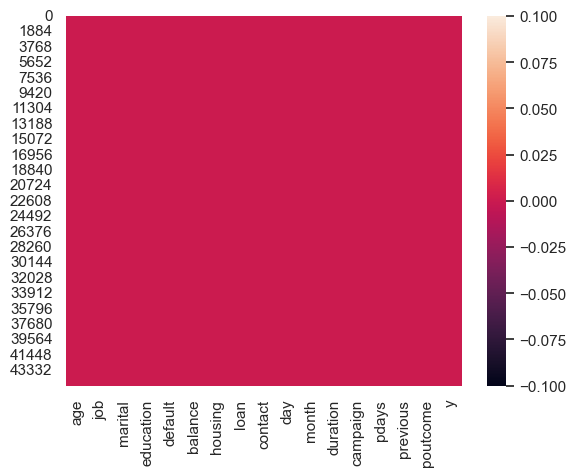

In [90]:
sns.heatmap(df.isnull())
plt.show()

In [91]:
df.duplicated().sum()

0

In [92]:
numeric_df = df.select_dtypes(include=[np.number])

for column in numeric_df.columns:
    Q1 = numeric_df[column].quantile(0.25)
    Q3 = numeric_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = numeric_df[(numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)]
    print(f"{column}: {outliers.shape[0]} outliers")

age: 487 outliers
balance: 4729 outliers
day: 0 outliers
duration: 3235 outliers
campaign: 3064 outliers
pdays: 8257 outliers
previous: 8257 outliers


In [93]:
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

for col in numeric_cols:
    df = remove_outliers(df, col)

print("Data shape after removing outliers: ", df.shape)

Data shape after removing outliers:  (28069, 17)


# Data Analysis

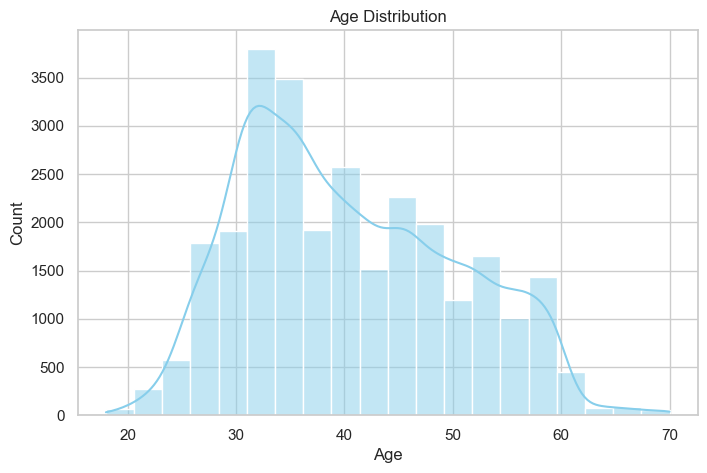

In [95]:
plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\Priso\AppData\Local\Temp\ipykernel_14044\1519078251.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="y", data=df, palette="Set2")


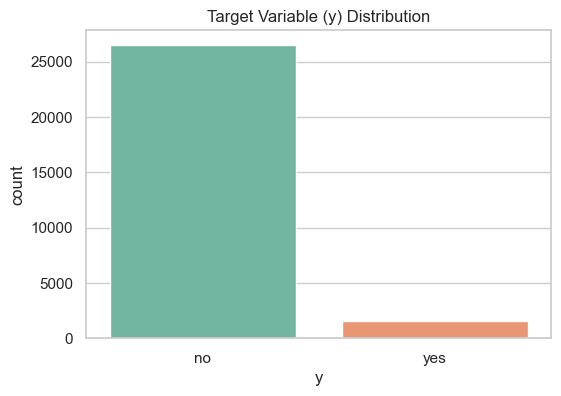

In [96]:
plt.figure(figsize=(6,4))
sns.countplot(x="y", data=df, palette="Set2")
plt.title("Target Variable (y) Distribution")
plt.show()

C:\Users\Priso\AppData\Local\Temp\ipykernel_14044\317172267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="y", y="balance", data=df, palette="coolwarm")


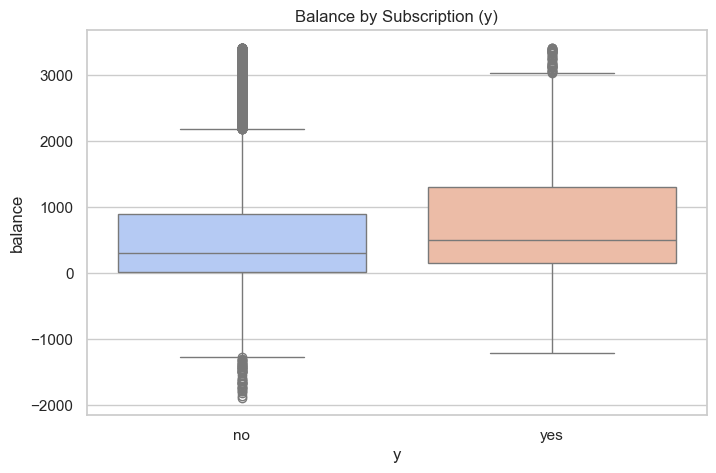

In [97]:
plt.figure(figsize=(8,5))
sns.boxplot(x="y", y="balance", data=df, palette="coolwarm")
plt.title("Balance by Subscription (y)")
plt.show()

C:\Users\Priso\AppData\Local\Temp\ipykernel_14044\4094027044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="job", data=df, order=df["job"].value_counts().index, palette="viridis")


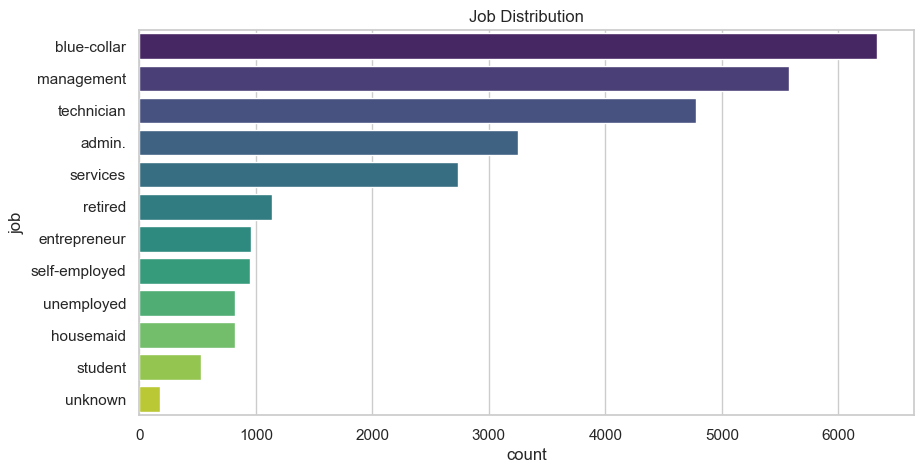

In [98]:
plt.figure(figsize=(10,5))
sns.countplot(y="job", data=df, order=df["job"].value_counts().index, palette="viridis")
plt.title("Job Distribution")
plt.show()

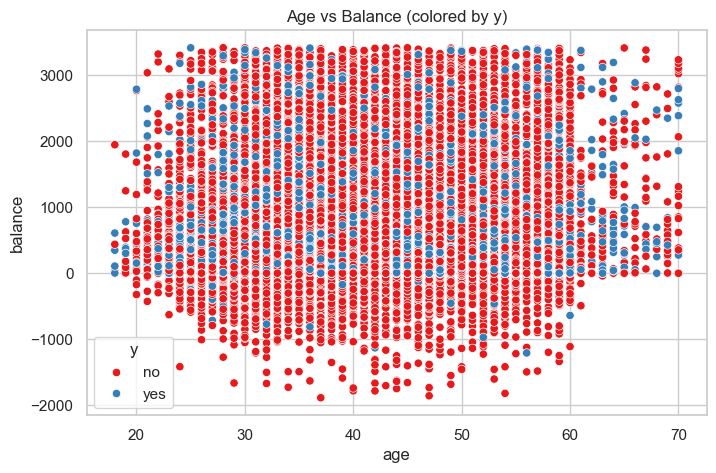

In [99]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="age", y="balance", hue="y", data=df, palette="Set1")
plt.title("Age vs Balance (colored by y)")
plt.show()

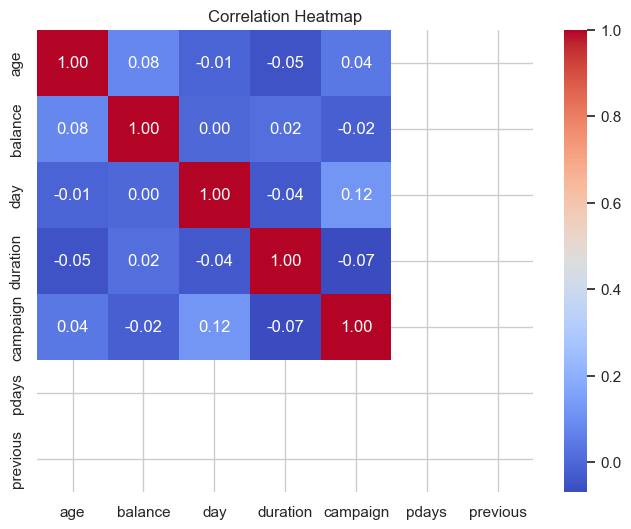

In [100]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\Priso\AppData\Local\Temp\ipykernel_14044\3539756714.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="y", y="duration", data=df, palette="Set3")


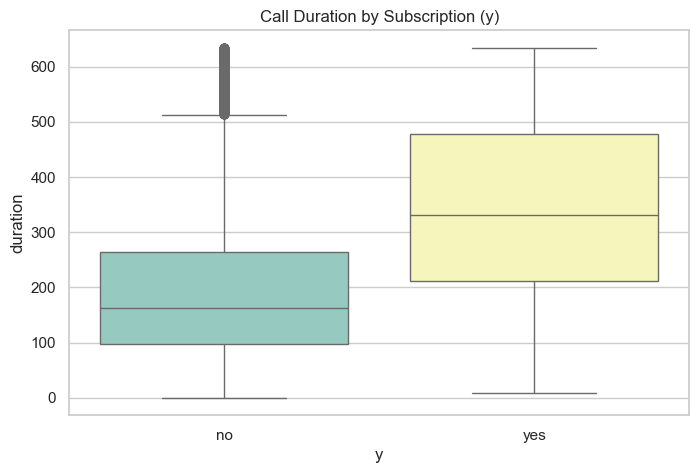

In [101]:
plt.figure(figsize=(8,5))
sns.boxplot(x="y", y="duration", data=df, palette="Set3")
plt.title("Call Duration by Subscription (y)")
plt.show()

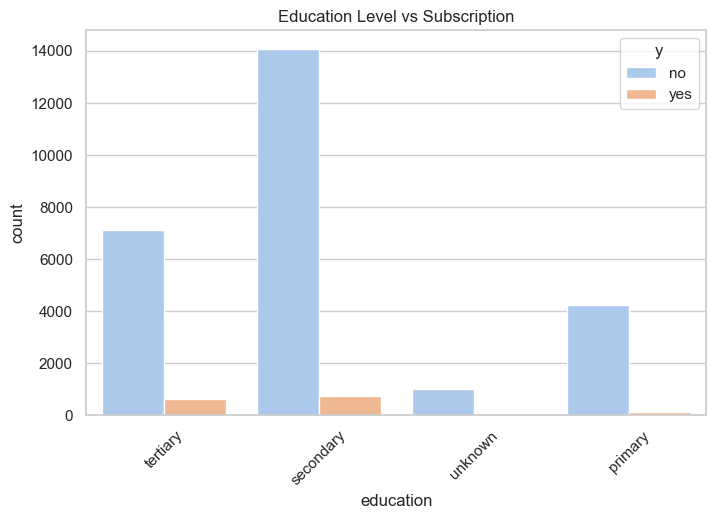

In [102]:
plt.figure(figsize=(8,5))
sns.countplot(x="education", hue="y", data=df, palette="pastel")
plt.title("Education Level vs Subscription")
plt.xticks(rotation=45)
plt.show()

# Data Transformation


In [104]:
categorical_columns = ["job","marital","education","default",
                       "housing","loan","contact","month","poutcome","y"]

label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 28069 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        28069 non-null  int64
 1   job        28069 non-null  int32
 2   marital    28069 non-null  int32
 3   education  28069 non-null  int32
 4   default    28069 non-null  int32
 5   balance    28069 non-null  int64
 6   housing    28069 non-null  int32
 7   loan       28069 non-null  int32
 8   contact    28069 non-null  int32
 9   day        28069 non-null  int64
 10  month      28069 non-null  int32
 11  duration   28069 non-null  int64
 12  campaign   28069 non-null  int64
 13  pdays      28069 non-null  int64
 14  previous   28069 non-null  int64
 15  poutcome   28069 non-null  int32
 16  y          28069 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 2.8 MB
None


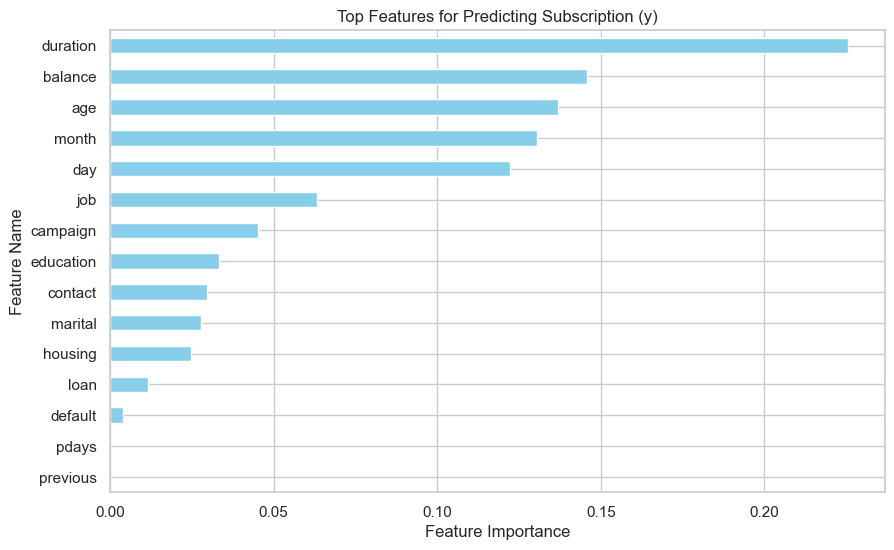

In [105]:
X = df.drop("y", axis=1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
top_features.plot(kind="barh", color="skyblue")
plt.gca().invert_yaxis()
plt.title("Top Features for Predicting Subscription (y)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.show()

# Delete Features

In [107]:
df.drop(["default","pdays","previous"],axis = 1 ,inplace = True)

In [108]:
df.shape

(28069, 14)

In [109]:
df.y.value_counts()

y
0    26504
1     1565
Name: count, dtype: int64

# Create Model


In [111]:
X = df.drop("y", axis=1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                    random_state=42, shuffle=True)

In [128]:
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

print("Before undersampling:", X_train.shape, y_train.value_counts().to_dict())
print("After undersampling :", X_train_resampled.shape, y_train_resampled.value_counts().to_dict())

Before undersampling: (22455, 13) {0: 21207, 1: 1248}
After undersampling : (2496, 13) {0: 1248, 1: 1248}


In [130]:
model1 = LogisticRegression()
model2 = GaussianNB()
model3 = MLPClassifier()
model4 = RandomForestClassifier()
model5 = DecisionTreeClassifier()
model6 = GradientBoostingClassifier()
model7 = XGBClassifier()


accuracies = []

def all(model):
    model.fit(X_train_resampled, y_train_resampled)
    pred = model.predict(X_test)
    accuracy = accuracy_score(pred,y_test)
    print("accuracy =",accuracy)
    accuracies.append(accuracy)


all(model1)
all(model2)
all(model3)
all(model4)
all(model5)
all(model6)
all(model7)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy = 0.7538297114356964
accuracy = 0.7076950480940506
accuracy = 0.7641610260064126
accuracy = 0.8083363021018881
accuracy = 0.7677235482721767
accuracy = 0.8238332739579622
accuracy = 0.8387958674741717


In [132]:
algorithms = ["LogisticRegression","GaussianNB","MLPClassifier","RandomForestClassifier"," DecisionTreeClassifier","GradientBoostingClassifier","XGBClassifier"]
result = pd.DataFrame({"algorithms":algorithms,"accuracies":accuracies})
result

,algorithms,accuracies
0,LogisticRegression,0.753830
1,GaussianNB,0.707695
2,MLPClassifier,0.764161
3,RandomForestClassifier,0.808336
4,DecisionTreeClassifier,0.767724
5,GradientBoostingClassifier,0.823833
6,XGBClassifier,0.838796


In [140]:
model7 = XGBClassifier()
model7.fit(X_train_resampled,y_train_resampled)
y_pred = model4.predict(X_test)

In [142]:
print(model4.score(X_train, y_train))
print(model4.score(X_test, y_test))

0.8242707637497216
0.8083363021018881


In [144]:
cr = classification_report(y_test, y_pred)
print('Classification Report:',cr)

Classification Report:               precision    recall  f1-score   support

           0       0.99      0.81      0.89      5297
           1       0.21      0.86      0.34       317

    accuracy                           0.81      5614
   macro avg       0.60      0.83      0.61      5614
weighted avg       0.95      0.81      0.86      5614



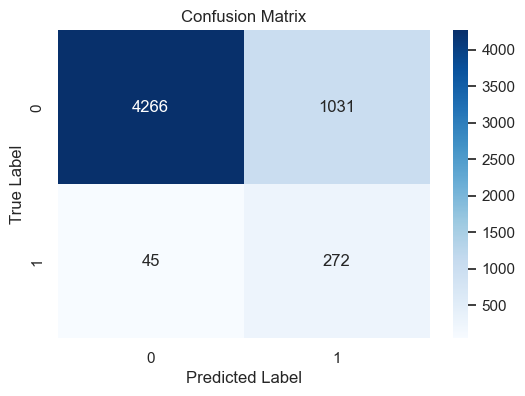

In [146]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()